<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-memowayun/blob/main/A01793695_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
## *Ciencia y Analítica de Datos*

### **Semana 7 -- Regresiones y K-means**


####**Curso: Ciencia y analítica de datos (Gpo 10)**

####**6 de Noviembre de 2022**


Nombre del estudiante: 

***Miguel Guillermo Galindo Orozco (A01793695)***


# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [4]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

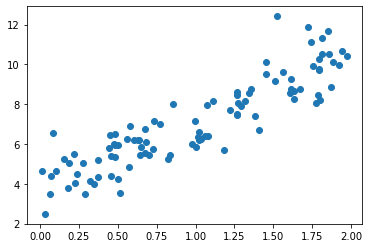

In [5]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [6]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [8]:
#X_fit[]

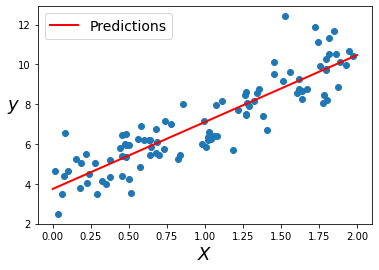

In [9]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [10]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [11]:
X_new.shape

(2, 1)

In [12]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [13]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [14]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [15]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

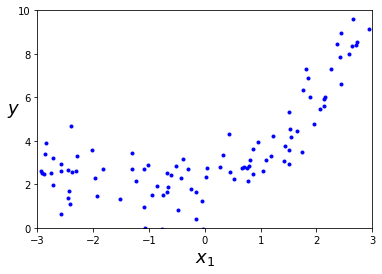

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [17]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [20]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [21]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [22]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

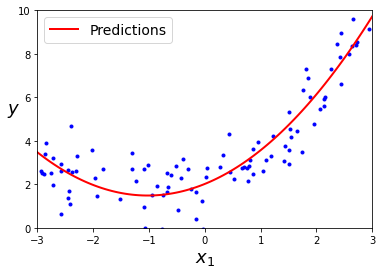

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [26]:
len(X)

1000

In [27]:
y.describe()

count    1000.000000
mean       40.052999
std        10.595322
min        20.000000
25%        32.912036
50%        38.345781
75%        44.531822
max       100.000000
Name: Manufacturing Cost, dtype: float64

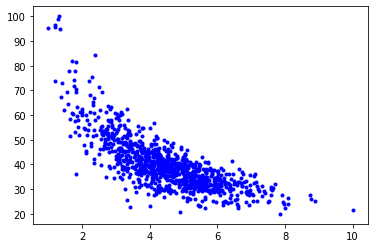

In [28]:
plt.plot(X,y,'b.')

# **Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar**

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 700
Tamaño de X_train: (700, 1)
**************************************************
Mumero total de registros en el test dataset: 300
Tamaño del X_test: (300, 1)


### **Regresión Lineal.**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

**Generar Modelo**

In [30]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

**Ecuación**

In [31]:
 linear_reg.coef_, linear_reg.intercept_

(array([-5.98980103]), 66.89748040122576)

Ecuación del Modelo:

$\hat{y} = -5.98X + 66.89$

**Visualización del Modelo con Datos Test**

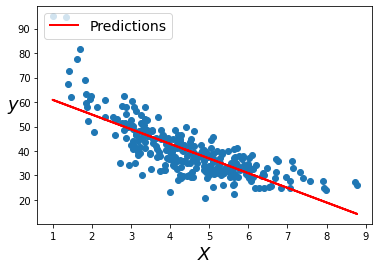

In [32]:
y_pred = linear_reg.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores & R Cuadrada (en población Test)**

In [33]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 4.848701594938563
Root Mean Squared Error: 6.73635897582296
r2_score 0.6056489925064351


### **Regresión Polinomial**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

**Generar los polinomios**

Con esto creamos un nuevo atributo como el cuadrado del atributo original 

(para población Train & Test)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

**Generamos y entrenamos el modelo**

Sólo se entrena para población Train

In [35]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

**Ecuación**

In [36]:
lin_reg.coef_, lin_reg.intercept_

(array([-16.31070656,   1.12220051]), 88.6430234056414)

Ecuación del modelo:

$\hat{y} =  -16.31X +1.12X^2 + 88.64$

**Visualización del Modelo con Datos Test**

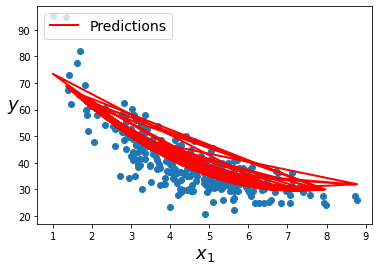

In [37]:
y_pred_pol = lin_reg.predict(X_test_poly)

plt.clf()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_pol, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


**Errores & R Cuadrada (en población Test)**

In [38]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_pol))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pol)))
print('r2_score',r2_score(y_test, y_pred_pol))

Error medio Absoluto (MAE): 4.31223424930749
Root Mean Squared Error: 5.778833048851248
r2_score 0.7097897110152587


### **Realiza la regresión con Ridge y Lasso** 

Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

#### **Ridge**

**Generación y entrenamiento del modelo**

Sólo población Train

In [39]:
from sklearn.linear_model import Ridge

ridge_m = Ridge(alpha=1)
ridge_m.fit(X_train, y_train)

Ridge(alpha=1)

**Ecuación**

In [40]:
ridge_m.coef_, ridge_m.intercept_

(array([-5.98492157]), 66.87566897901411)

Ecuación del modelo Ridge con alpha =1 :

$\hat{y} =  -5.98X + 66.87$

**Visualización del Modelo con Datos Test**

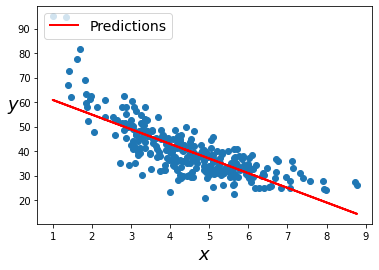

In [41]:
y_pred_ridge = ridge_m.predict(X_test)

plt.clf()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_ridge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


**Errores & R Cuadrada (en población Test)**

In [42]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('r2_score',r2_score(y_test, y_pred_ridge))

Error medio Absoluto (MAE): 4.848753492202556
Root Mean Squared Error: 6.736550247387687
r2_score 0.6056265978551478


#### **Lasso**

**Generación y entrenamiento del modelo**

Sólo población Train

In [43]:
from sklearn.linear_model import Lasso

lasso_m = Lasso(alpha=1.0)
lasso_m.fit(X_train, y_train)

Lasso()

**Ecuación**

In [44]:
lasso_m.coef_, lasso_m.intercept_

(array([-5.41909655]), 64.34640343911663)

Ecuación del modelo Lasso con alpha =1 :

$\hat{y} =  -5.41X + 64.34$

**Visualización del Modelo con Datos Test**

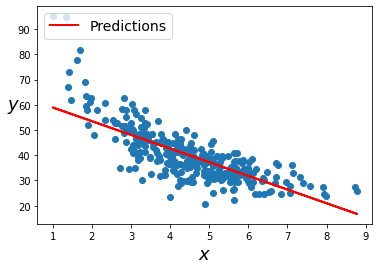

In [45]:
y_pred_lasso = lasso_m.predict(X_test)

plt.clf()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


**Errores & R Cuadrada (en población Test)**

In [46]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('r2_score',r2_score(y_test, y_pred_lasso))

Error medio Absoluto (MAE): 4.86800710536822
Root Mean Squared Error: 6.802919591715191
r2_score 0.5978174850509593


## Finalmente grafica :

-   MAE (de los cuatro métodos)
-   R2 (de los cuatro métodos)

**MAE**

In [47]:
mae_lin_reg = metrics.mean_absolute_error(y_test, y_pred)
mae_lin_reg_poly = metrics.mean_absolute_error(y_test, y_pred_pol)
mae_lin_reg_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
mae_lin_reg_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
data = {'Method': ['Linear_Reg', 'Poly_Lin_Reg', 'Ridge', 'Lasso'], 'MAE': [mae_lin_reg, mae_lin_reg_poly, mae_lin_reg_ridge, mae_lin_reg_lasso]}  
mae = pd.DataFrame(data)  
print(mae)  

         Method       MAE
0    Linear_Reg  4.848702
1  Poly_Lin_Reg  4.312234
2         Ridge  4.848753
3         Lasso  4.868007


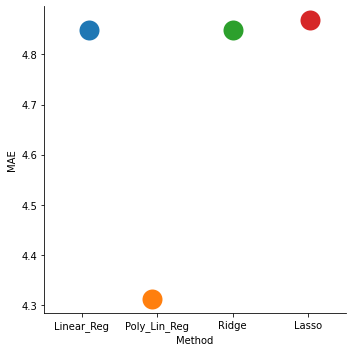

In [48]:
import seaborn as sns

sns.catplot(data=mae, x="Method", y="MAE",s = 20)

**R2**

In [49]:
r2_lin_reg = metrics.r2_score(y_test, y_pred)
r2_lin_reg_poly = metrics.r2_score(y_test, y_pred_pol)
r2_lin_reg_ridge = metrics.r2_score(y_test, y_pred_ridge)
r2_lin_reg_lasso = metrics.r2_score(y_test, y_pred_lasso)
data = {'Method': ['Linear_Reg', 'Poly_Lin_Reg', 'Ridge', 'Lasso'], 'R2': [r2_lin_reg, r2_lin_reg_poly, r2_lin_reg_ridge, r2_lin_reg_lasso]}  
r2 = pd.DataFrame(data)  
print(r2)  

         Method        R2
0    Linear_Reg  0.605649
1  Poly_Lin_Reg  0.709790
2         Ridge  0.605627
3         Lasso  0.597817


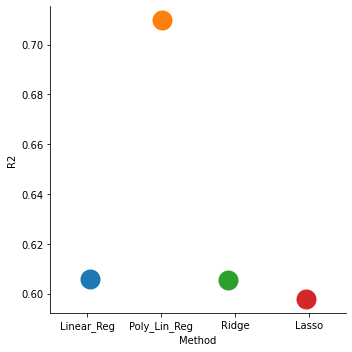

In [50]:
sns.catplot(data=r2, x="Method", y="R2",s = 20)

## **Explica tus resultados** 

**¿Qué método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Con lo anterior, le conviene a la empresa utilizar la regresión lineal con transformación polinomial (cuadrado de los atributos), esto se explica porque la relación de la variable independiente (Número de unidades) con la variable dependiente (Costo de manufactura) siguen una relación más similar a una cuadrática que a una función lineal. Al tener los atributos de manera lineal, y cuadrática, permite a la regresión lineal capturar mejor estos efectos y presentar mejores métricas de desempeño tanto para el entrenamiento como para el set de validación. 
Se utilizaron un 70% de entrenamiento y 30% de validación como un estándar en la industria que permite identificar la capacidad de entrenamiento, y valorar si se está sub entrenando o sobre entrenando. Los resultados observados, no arrojan que se esté sobre entrenando. 
El error medido con MAE fue de 4,3 dólares con la regresión polinomial lo cual es un error aceptable ya que la desviación estandar en la distribución del costo de manufactura es de 10 dls, lo cual muestra que el error obtenido es menor a este, y se concluye que es un modelo óptimo que permite tomar decisiones con él.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5826,1773101159,20150107T000000,250000.0,3,2.25,1050,572,2.0,0,0,...,7,740,310,2006,0,98106,47.5549,-122.363,1260,1062
19234,1324079029,20150317T000000,200000.0,3,1.00,960,213008,1.0,0,0,...,6,960,0,1933,0,98024,47.5621,-121.862,1520,57499
8642,9144100298,20150302T000000,380000.0,3,1.00,1260,7980,1.0,0,0,...,7,1260,0,1951,0,98177,47.7013,-122.373,1760,7606
5814,1922069071,20150424T000000,411000.0,4,1.75,2250,292288,1.0,0,0,...,7,2250,0,1963,0,98042,47.3787,-122.091,1550,23798
971,2009001600,20150506T000000,265000.0,3,1.00,1070,9000,1.0,0,0,...,7,1070,0,1950,0,98198,47.4061,-122.330,1840,12000
5331,3629930170,20140514T000000,723000.0,4,2.50,2700,4004,2.0,0,0,...,9,2700,0,2004,0,98029,47.5521,-121.995,2260,4459
8564,8645510230,20140529T000000,332000.0,3,2.25,2270,8876,1.0,0,0,...,7,1380,890,1977,0,98058,47.4653,-122.176,2150,7455
16547,526059259,20140819T000000,335500.0,3,1.75,1260,8487,1.0,0,0,...,7,1260,0,1970,0,98011,47.7664,-122.201,1890,13051
19682,2523039346,20150218T000000,720000.0,4,3.25,3276,10801,2.0,0,0,...,9,3276,0,2008,0,98166,47.4585,-122.361,2010,11656
15095,2141500020,20141217T000000,500000.0,4,2.50,2230,8560,2.0,0,0,...,8,2230,0,2002,0,98059,47.4877,-122.143,2400,7756


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [53]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [54]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


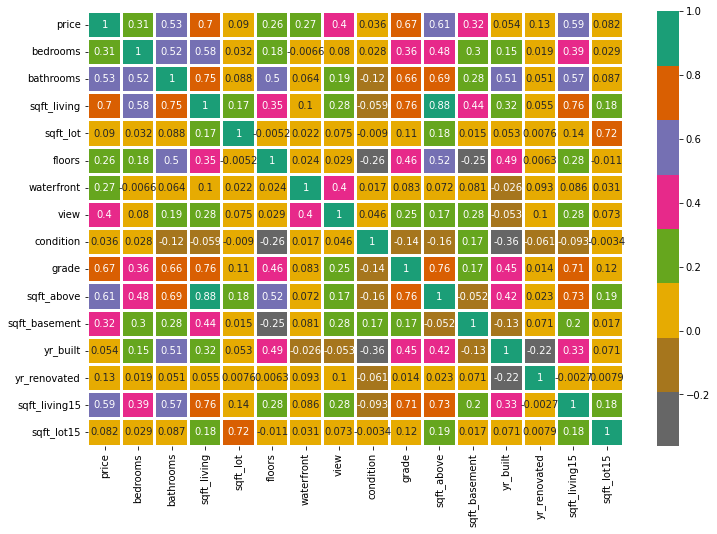

In [55]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [56]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

# **Ejercicio 2. Regresión múltiple.** 

AQUÍ TU CÓDIGO

Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


Primero: 

Decido escalar (restar la media y dividir por la desviación estandar)las variables para tenerlas en la misma escala (media cero y std dev en 1)

In [58]:
## Librería necesaria
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)


### **Regresión Lineal.**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

**Generar Modelo**

In [59]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train_sc, y_train)

LinearRegression()

**Ecuación**

In [60]:
 linear_reg.coef_, linear_reg.intercept_

(array([[ -35668.70284466,   31880.11003687,   74278.73211217,
             709.02976685,   17063.91938752,   48347.72152378,
           31665.30347596,   13814.98526045,  140605.41191444,
           61706.89220533,   38643.72527878, -104165.37949974,
            5346.30295863,   19878.29179843,  -14985.43540617]]),
 array([539150.73672305]))

In [61]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

Ecuación del Modelo:

$\hat{y} = -35668.70 bedrooms 
+ 31880.11 bathrooms
+ 74278.73 sqft_living 
+ 709.02 sqft_lot
+ 17063.91 floors
+ 48347.72 waterfront 
+ 31665.30 view 
+ 13814.98 condition 
+ 140605.41 grade 
+ 61706.89 sqftAbove 
+ 38643.72 sqftBasement
- 104165.37 yrBuilt 
+ 5346.30 yrRenovated
+ 19878.29 sqft_living15
- 14985.43 sqft_lot15
+ 6151359.26$

**Visualización del Modelo con Datos Test**

Al ser un modelo de regresión lineal con multiples variables, no es fácil graficar la relación de las predicciones del modelo con multiples variables. 
En su lugar, decidí graficar el modelo con respecto a una sóla variable a la vez, las que presentan mayor correlación con la variable de respuesta.

Relación SQFT_LIVING

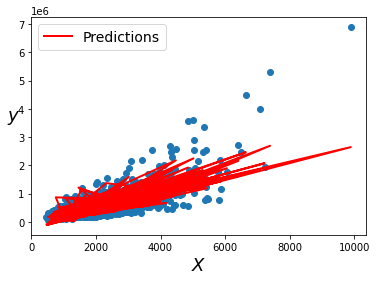

In [62]:
y_pred = linear_reg.predict(X_test_sc)

plt.scatter(X_test['sqft_living'], y_test)
plt.plot(X_test['sqft_living'], y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Relación Price - Grade

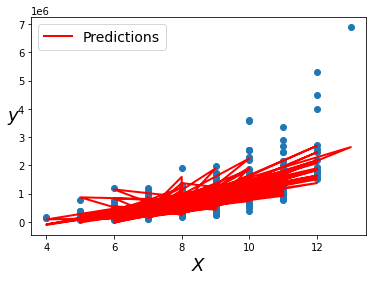

In [63]:
y_pred = linear_reg.predict(X_test_sc)

plt.scatter(X_test['grade'], y_test)
plt.plot(X_test['grade'], y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores & R Cuadrada (en población Test)**

In [64]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.1388273265
Root Mean Squared Error: 232133.367624069
r2_score 0.6579723205007987


### **Regresión Polinomial**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

**Generar los polinomios**

Con esto creamos un nuevo atributo como el cuadrado del atributo original 

(para población Train & Test)

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_sc)
X_test_poly = poly_features.fit_transform(X_test_sc)

**Generamos y entrenamos el modelo**

Sólo se entrena para población Train

In [66]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

**Coeficientes**

In [67]:
lin_reg.coef_, lin_reg.intercept_

(array([[-9.17556445e+03,  2.50127662e+04, -9.89014026e+15,
          8.97160129e+02, -5.25546753e+03,  3.15427786e+14,
          1.41531322e+03,  2.38686592e+04,  1.20373361e+05,
          8.90962956e+15,  4.78322229e+15, -7.20592449e+04,
         -8.09621889e+05,  4.26284459e+04, -3.54820386e+04,
          8.35471751e+02,  5.38676402e+03, -6.13997804e+15,
         -7.13527692e+02,  4.32664363e+03, -9.61080112e+02,
         -2.25391011e+02, -3.18689660e+03, -5.90168599e+03,
          5.53125925e+15,  2.96951095e+15, -1.27769037e+04,
         -3.43135067e+03,  1.10307912e+04,  5.54104256e+03,
         -5.65086733e+03, -5.20296208e+15, -4.31401381e+03,
         -1.07142500e+04,  2.92162500e+03,  2.22125000e+03,
         -5.51500000e+02,  2.01418750e+04,  4.68713927e+15,
          2.51633683e+15,  1.13312500e+04, -5.31475000e+03,
         -9.07406250e+03, -1.16300000e+03,  1.01816077e+16,
          1.66633013e+14, -1.17077867e+15,  2.59678984e+14,
          9.34148123e+14,  6.22389615e+1

**Visualización del Modelo con Datos Test**

Relación SQFT_LIVING

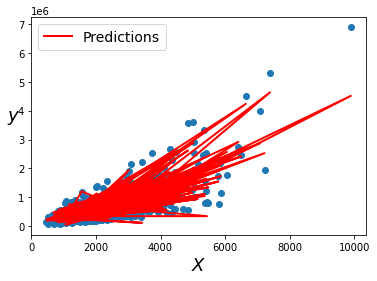

In [68]:
y_pred_pol = lin_reg.predict(X_test_poly)

plt.scatter(X_test['sqft_living'], y_test)
plt.plot(X_test['sqft_living'], y_pred_pol, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores & R Cuadrada (en población Test)**

In [69]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_pol))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pol)))
print('r2_score',r2_score(y_test, y_pred_pol))

Error medio Absoluto (MAE): 121316.53705155816
Root Mean Squared Error: 186279.18879629826
r2_score 0.7797505735329586


### **Realiza la regresión con Ridge y Lasso** 

Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

#### **Ridge**

**Generación y entrenamiento del modelo**

Sólo población Train

In [70]:
from sklearn.linear_model import Ridge

ridge_m = Ridge(alpha=1)
ridge_m.fit(X_train_sc, y_train)

Ridge(alpha=1)

**Ecuación**

In [71]:
ridge_m.coef_, ridge_m.intercept_

(array([[ -35663.36601205,   31877.8511199 ,   74277.11549118,
             708.55960356,   17064.28474302,   48345.5053587 ,
           31667.61753821,   13816.76423338,  140588.15295957,
           61705.23868876,   38643.46261232, -104152.30109948,
            5349.52295653,   19886.47681173,  -14984.14490535]]),
 array([539150.73672305]))

Ecuación del modelo Ridge con alpha =1 :

$\hat{y} = -35663.36 bedrooms 
+ 31877.85 bathrooms
+ 74277.11 sqft_living 
+ 708.55 sqft_lot
+ 17064.28 floors
+ 48345.50 waterfront 
+ 31667.61 view 
+ 13816.76 condition 
+ 140588.15 grade 
+ 61705.23 sqftAbove 
+ 38643.46 sqftBasement
- 104152.30 yrBuilt 
+ 5349.52 yrRenovated
+ 19886.47 sqft_living15
- 14984.14 sqft_lot15
+ 539150.73$



**Visualización del Modelo con Datos Test**

Relación SQFT_LIVING

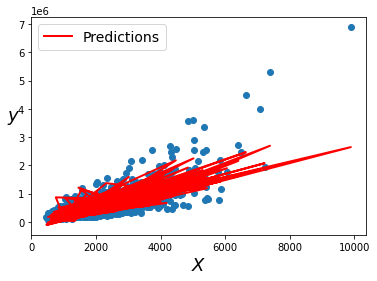

In [72]:
y_pred_ridge = ridge_m.predict(X_test_sc)

plt.scatter(X_test['sqft_living'], y_test)
plt.plot(X_test['sqft_living'], y_pred_ridge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores & R Cuadrada (en población Test)**

In [73]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('r2_score',r2_score(y_test, y_pred_ridge))

Error medio Absoluto (MAE): 137478.9124710943
Root Mean Squared Error: 232134.50779952898
r2_score 0.6579689606001647


#### **Lasso**

**Generación y entrenamiento del modelo**

Sólo población Train

In [74]:
from sklearn.linear_model import Lasso

lasso_m = Lasso(alpha=1.0)
lasso_m.fit(X_train_sc, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.769e+13, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

**Ecuación**

In [75]:
lasso_m.coef_, lasso_m.intercept_

(array([ -35667.58647294,   31873.47946843,  266683.0974179 ,
            705.98850841,   17063.55788645,   48346.92163233,
          31665.52171628,   13813.80986298,  140607.30993572,
        -111615.35536755,  -54405.56794188, -104163.00977398,
           5345.61741469,   19872.32622489,  -14982.4586916 ]),
 array([539150.73672305]))

Ecuación del modelo Lasso con alpha =1 :

$\hat{y} = -35663.58 bedrooms 
+ 31873.47 bathrooms
+ 266683.09 sqft_living 
+ 705.98 sqft_lot
+ 17063.55 floors
+ 48346.92 waterfront 
+ 31665.52 view 
+ 13813.80 condition 
+ 140607.30grade 
- 111615.35 sqftAbove 
- 54405.56 sqftBasement
- 104163.00 yrBuilt 
+ 5345.61 yrRenovated
+ 19972.32 sqft_living15
- 14982.45 sqft_lot15
+ 539150.73$



**Visualización del Modelo con Datos Test**

Relación SQFT_LIVING

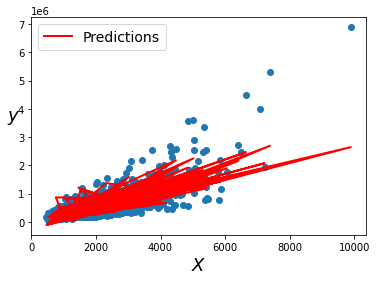

In [76]:
y_pred_lasso = lasso_m.predict(X_test_sc)

plt.scatter(X_test['sqft_living'], y_test)
plt.plot(X_test['sqft_living'], y_pred_lasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores & R Cuadrada (en población Test)**

In [77]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('r2_score',r2_score(y_test, y_pred_lasso))

Error medio Absoluto (MAE): 137480.34380036034
Root Mean Squared Error: 232133.25403322227
r2_score 0.6579726552325489


## Finalmente grafica :

-   MAE (de los cuatro métodos)
-   R2 (de los cuatro métodos)

**MAE**

In [78]:
mae_lin_reg = metrics.mean_absolute_error(y_test, y_pred)
mae_lin_reg_poly = metrics.mean_absolute_error(y_test, y_pred_pol)
mae_lin_reg_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
mae_lin_reg_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
data = {'Method': ['Linear_Reg', 'Poly_Lin_Reg', 'Ridge', 'Lasso'], 'MAE': [mae_lin_reg, mae_lin_reg_poly, mae_lin_reg_ridge, mae_lin_reg_lasso]}  
mae = pd.DataFrame(data)  
print(mae)  

         Method            MAE
0    Linear_Reg  137480.138827
1  Poly_Lin_Reg  121316.537052
2         Ridge  137478.912471
3         Lasso  137480.343800


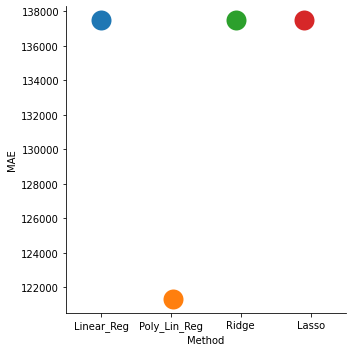

In [79]:
import seaborn as sns

sns.catplot(data=mae, x="Method", y="MAE",s = 20)

**R2**

In [80]:
r2_lin_reg = metrics.r2_score(y_test, y_pred)
r2_lin_reg_poly = metrics.r2_score(y_test, y_pred_pol)
r2_lin_reg_ridge = metrics.r2_score(y_test, y_pred_ridge)
r2_lin_reg_lasso = metrics.r2_score(y_test, y_pred_lasso)
data = {'Method': ['Linear_Reg', 'Poly_Lin_Reg', 'Ridge', 'Lasso'], 'R2': [r2_lin_reg, r2_lin_reg_poly, r2_lin_reg_ridge, r2_lin_reg_lasso]}  
r2 = pd.DataFrame(data)  
print(r2)  

         Method        R2
0    Linear_Reg  0.657972
1  Poly_Lin_Reg  0.779751
2         Ridge  0.657969
3         Lasso  0.657973


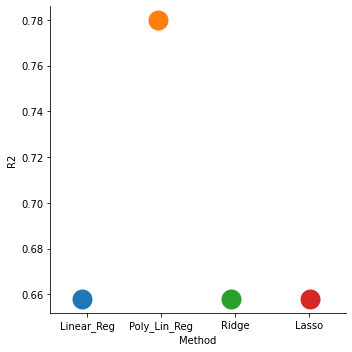

In [81]:
sns.catplot(data=r2, x="Method", y="R2",s = 20)

## **Explica tus resultados**

Que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Con los resultados obtenidos, observamos que la regresión lineal con aproximación polinomial permite explicar mejor la relación de las variables independientes con la variable dependiente, lo anterior se ve reflejado con un R2 más alta en comparación con los otros métodos, al presentar el valor de 0.78. En este caso en específico se utilizó el 90% de la población para entrenar y sólo el 10% para validar. Lo cuál permitió obtener un buen ajuste sin sub entrenarse o sobre entrenarse, sin embargo, se sugiere realizar validaciones out of time, para evaluar si el desempeño del modelo se mantiene en el tiempo.

Por otro lado, el error obtenido por este método es en promedio de 121k dls, que a pesar de ser menor a la desviación estándar en la distribución de la variable (367k dls) sigue siendo un error bastante alto. Y al tratarse de precios de casas, una diferencia en la estimación de 167k no es óptima, y no permite tomar las mejores decisiones. Se sugiere indagar nuevos métodos, realizar selección de atributos, o buscar nuevas fuentes de información.

# **Conclusiones**

Los ejercicios anteriores permiten poner en práctica la facilidad de implementación de modelos lineales en situaciones de negocio real, que a su vez permiten tomar decisiones y optimizar los resultados.
Desde mi experiencia, estos modelos son muy útiles para intentar encontrar las relaciones iniciales con la variable de respuesta, y establecer un benchmark mínimo como modelo a superar. 
Adicionalmente, la diferencia entre las problemáticas de los ejercicos, muestran que un modelo simple puede ser una solución suficiente con métricas aceptables para modelar un comportamiento, sin embargo, el problema define cómo implementar dicha solución, y no es sólo cuestión de guiarnos por una métrica, sino en su lugar utilizar todo el contexto del problema con el fin de poder tomar decisiones que generen valor.

**Referencias**

Capitulos 4 -> Training Models-> Regresiones

https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynbEnlaces a un sitio externo.

 

Capitulo 5.06 ->In Depth: Linear Regression

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb